Soumyojyoti Deb soumyojyoti.deb2021@vitstudent.ac.in

Assignment 4

In [5]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('/content/winequality-red.csv')

df.head()

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


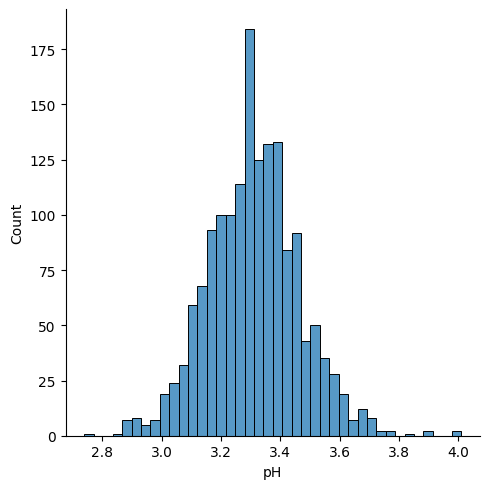

In [6]:
sns.displot(df.pH)

<Axes: xlabel='total sulfur dioxide', ylabel='pH'>

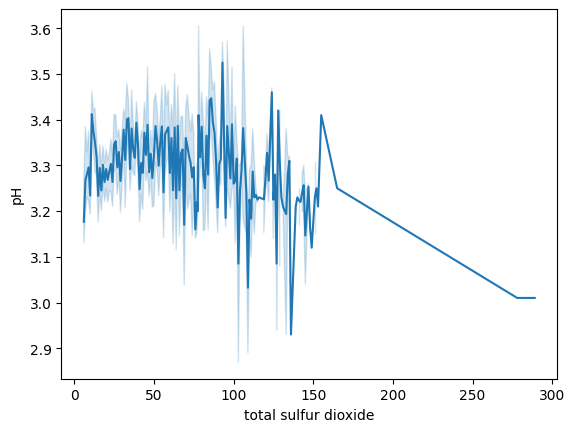

In [7]:
sns.lineplot(x=df['total sulfur dioxide'], y=df['pH'])

In [8]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

<Axes: >

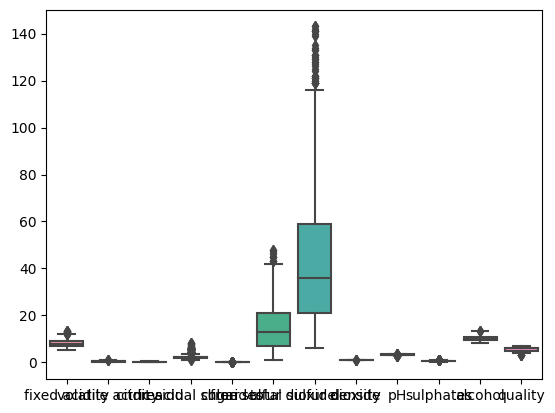

In [9]:
for col in list(df.columns):
  p99 = df[col].quantile(0.99)
  df = df[df[col]<=p99]
sns.boxplot(df)

In [13]:
y = df['quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1421, dtype: int64

In [14]:
x = df.drop(columns = ['quality'], axis = 1)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [17]:
MMSc = MinMaxScaler()
x_scaled = pd.DataFrame(MMSc.fit_transform(x), columns = x.columns)
x_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.280488,0.644444,0.000000,0.135135,0.194529,0.212766,0.204380,0.734093,0.777778,0.273810,0.204082
1,0.329268,0.844444,0.000000,0.229730,0.261398,0.510638,0.445255,0.639126,0.395062,0.416667,0.285714
2,0.329268,0.711111,0.057971,0.189189,0.243161,0.297872,0.350365,0.658120,0.469136,0.380952,0.285714
3,0.743902,0.177778,0.811594,0.135135,0.191489,0.340426,0.394161,0.753086,0.345679,0.297619,0.285714
4,0.280488,0.644444,0.000000,0.135135,0.194529,0.212766,0.204380,0.734093,0.777778,0.273810,0.204082


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y)
y_train.head()

1292    6
653     6
296     5
793     5
365     6
Name: quality, dtype: int64

In [19]:
ForestModel = RandomForestClassifier(criterion='entropy')
ForestModel.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [20]:
y_estimate = ForestModel.predict(x_test)
y_estimate

array([6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 7, 5, 6, 6, 5, 5, 5, 6, 7, 5,
       6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 7,
       6, 5, 6, 5, 5, 7, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5,
       5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 7, 5, 5, 5, 6, 5, 6,
       6, 6, 6, 5, 7, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6,
       5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6,
       6, 5, 5, 7, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 7, 5,
       7, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 7, 5, 6, 5, 5, 7, 6, 5, 6, 5, 6,
       5, 6, 6, 7, 5, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5,
       6, 6, 5, 5, 5, 7, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5,
       6, 6, 5, 7, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5,
       6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 7, 6, 5, 6, 5, 5, 6,
       7, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5,
       6, 6, 6, 7, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 7,

In [21]:
y_estimate1 = ForestModel.predict(x_train)
y_estimate1

array([6, 6, 5, ..., 7, 6, 7])

In [22]:
comparison1 = pd.DataFrame({'Actual quality': y_test, 'Model estimated quality': y_estimate})
comparison1

,Actual quality,Model estimated quality
1360,5,6
1175,6,6
1249,6,6
497,5,5
532,5,5
...,...,...
64,5,5
960,6,6
915,6,7
1459,7,7


In [23]:
print('Test Accuracy = ', accuracy_score(y_test, y_estimate))
print('Train Accuracy = ', accuracy_score(y_train, y_estimate1))

Test Accuracy =  0.7134831460674157
Train Accuracy =  1.0


In [24]:
print(classification_report(y_test, y_estimate))
print(classification_report(y_train, y_estimate1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.75      0.81      0.78       164
           6       0.68      0.72      0.70       145
           7       0.67      0.43      0.52        37

    accuracy                           0.71       356
   macro avg       0.42      0.39      0.40       356
weighted avg       0.69      0.71      0.70       356

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00       452
           6       1.00      1.00      1.00       439
           7       1.00      1.00      1.00       133

    accuracy                           1.00      1065
   macro avg       1.00      1.00      1.00      1065
weighted avg       1.00      1.00      1.00      1065



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
ForestModel.predict([[ 7.4, 0.60, 0.00, 1.2, 0.076, 15.0, 21.0, 0.9978, 3.30, 0.47, 10.0 ]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5])